In [1]:
import time
import numpy as np
import numpy.linalg as la
from matplotlib import cm
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from ipywidgets import interact, IntSlider, FloatSlider, fixed

In [2]:
# to fix my laptop's dpi ( doesn't interfere with code)
def get_sys_dpi(w, h, diag):
    w_inch = (diag**2/(1+h**2/w**2))**0.5
    return round(w/w_inch)

rcParams['figure.dpi'] = get_sys_dpi(2560, 1600, 13.3)

In [3]:
def Quantum_1D(xmin,xmax,N,V):
    
    d = (xmax-xmin)/N
    d_sq = d*d
    
    A=np.zeros((N,N))
    
    i =0
    x=xmin+i*d
    A[i][i] = 2.0/d_sq + V(x)
    A[i][i+1] = -1.0/d_sq
    
    for i in range(1,N-1):
        x= xmin+i*d
        A[i][i-1] = -1.0/d_sq 
        A[i][i] = 2.0/d_sq + V(x)
        A[i][i+1] = -1.0/d_sq
        
    i=N-1
    x=xmin+i*d
    A[i][i] = 2.0/d_sq + V(x)
    A[i][i-1] = -1.0/d_sq
    
    ev, v = la.eig(A)
    indices = np.argsort(ev)
    
    for index in indices:
        try:
            energy.append(ev[index])
        except NameError:
            energy=[ev[index]]
        
        try:
            states.append(v[:,index])
        except NameError:
            states = [v[:,index]]
            
    return energy, states

#Quantum Harmonic Oscillator
    
def eigen_states(domain, plot_ev:True, result=False):
    
    a = domain
    N = 100
    
    harmonic_mod = lambda x:a*x if x>0 else -a*x  # modified harmonic oscilllator
    harmonic_ori = lambda x:x*x   # original harmonic oscillator 
    
    ev_mod, vv_mod = Quantum_1D(-a, a, N, harmonic_mod) 
    NN = [i for i in range(20)]    
    #theory = [(2*i+1) for i in NN]
    numerical_sol_mod = [ev_mod[i] for i in NN]
    
    
    ev_ori, vv_ori = Quantum_1D(-a, a, N, harmonic_ori)   
    numerical_sol_ori = [ev_ori[i] for i in NN]

    if plot_ev:
        fig=plt.figure(figsize=(4, 4))

        plt.plot(NN, numerical_sol_mod, marker='o',label=r'$V(x) = \alpha x: x>0, -\alpha x: x\leqslant0$')
        plt.plot(NN, numerical_sol_ori, marker='+',label=r'$V(x) = \frac{1}{2}m\omega^2x^2$')

        plt.xticks(np.arange(0,len(NN),step=2))
        plt.xlabel('n')
        plt.ylabel(r'Energy ($\frac{1}{2}\hbar\omega$)')
        plt.legend()
        plt.show()
    
    if result:
        return vv_mod, vv_ori




In [4]:
interact(eigen_states, domain=widgets.IntSlider(min=2.0, max=10.0, step=1, value=5))

interactive(children=(IntSlider(value=5, description='domain', max=10, min=2), Checkbox(value=True, descriptio…

<function __main__.eigen_states(domain, plot_ev: True, result=False)>

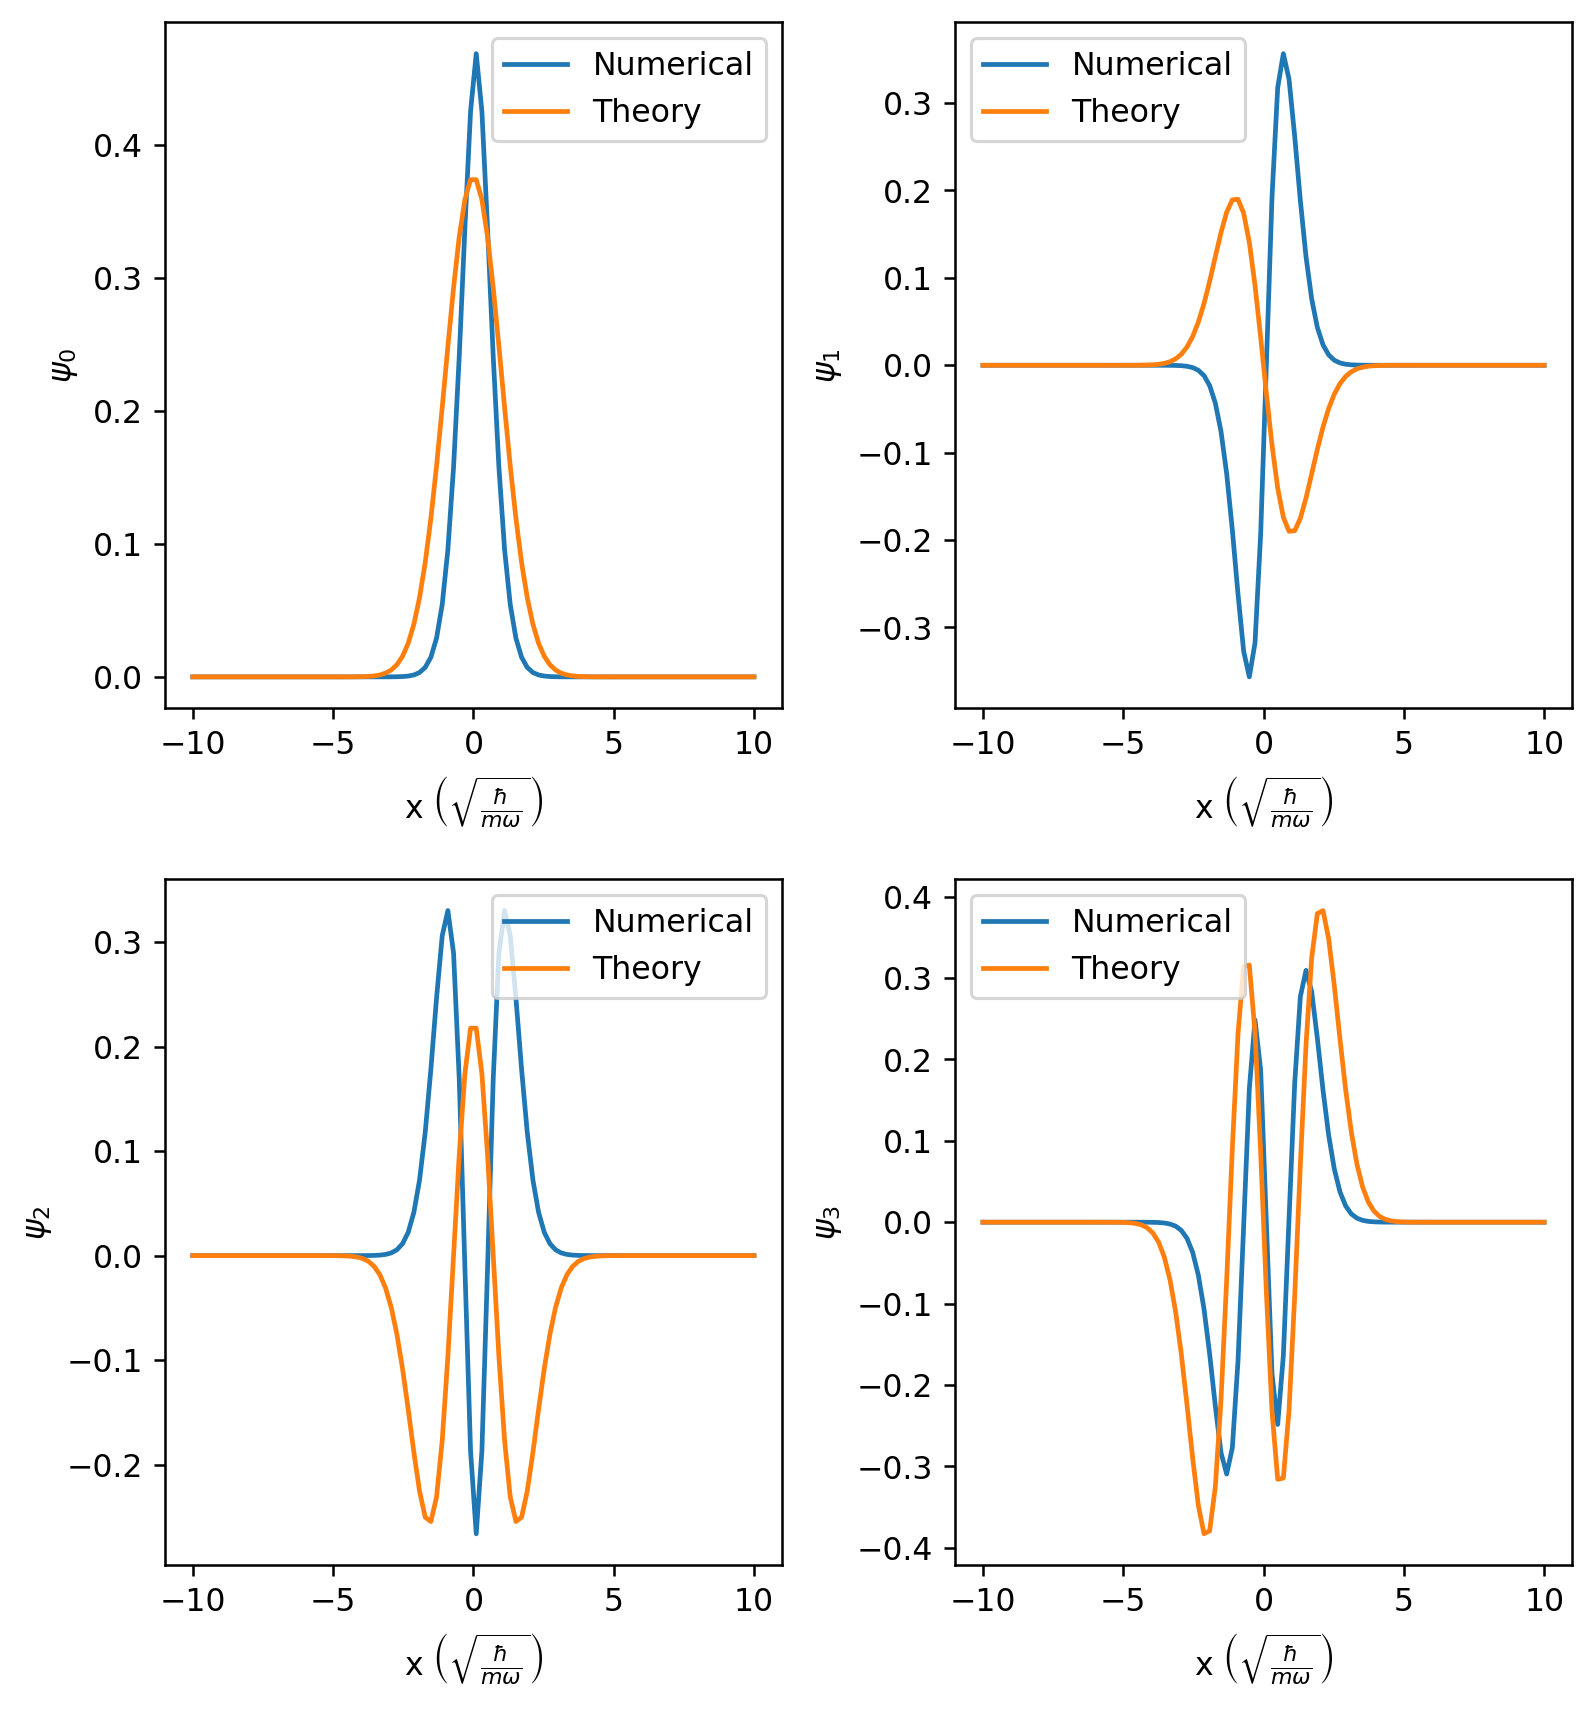

In [7]:
# four eigenstates
domain = 10
N = 100
x=np.linspace(-domain, domain, N)
theory0=[(1*np.pi)**-0.25 * np.exp(-xx*xx/2)/2 for xx in x]
theory1=[(2*np.pi)**-0.25 * np.exp(-xx*xx/2)*(-xx)/2 for xx in x]
theory2=[(8*np.pi)**-0.25 * np.exp(-xx*xx/2)*(-2*xx*xx+1)/2 for xx in x]
theory3=[(8*6*np.pi)**-0.25 * np.exp(-xx*xx/2)*(4*xx*xx*xx-6*xx)/2 for xx in x]

vv_mod, vv_ori = eigen_states(domain, plot_ev=False, result=True)
vv = vv_mod

fig=plt.figure(figsize=(8,9))
gs=fig.add_gridspec(2,2, hspace=0.25,wspace=0.28)
(ax0,ax1),(ax2,ax3)=gs.subplots()
ax0.plot(x,vv[0],label='Numerical')
ax0.plot(x,theory0,label='Theory')
ax0.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax0.set_ylabel(r'$\psi_0$')
ax0.legend()
 
ax1.plot(x,vv[1],label='Numerical')
ax1.plot(x,theory1,label='Theory')
ax1.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax1.set_ylabel(r'$\psi_1$')
ax1.legend()
               
ax2.plot(x,vv[2],label='Numerical')
ax2.plot(x,theory2,label='Theory')
ax2.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax2.set_ylabel(r'$\psi_2$')
ax2.legend()
               
ax3.plot(x,vv[3],label='Numerical')
ax3.plot(x,theory3,label='Theory')
ax3.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax3.set_ylabel(r'$\psi_3$')
ax3.legend()
plt.show()

### Comments
I provided an interactive widget just to see how the plot progresses as alpha increases.
How good is this approximation? I would say the approximation works pretty good at low value of N but not too well at high value of N.



https://ocw.mit.edu/courses/8-04-quantum-physics-i-spring-2016/
https://ocw.mit.edu/courses/8-04-quantum-physics-i-spring-2016/pages/lecture-notes/